# Comprensione e analisi esplorativa dei dati

Il dataset di riferimento si trova al seguente link su Kaggle: https://www.kaggle.com/datasets/dilwong/flightprices/.

Si tratta di un file .csv da 31.09 GB, da cui sono stati estratti tre *sample* di diverse dimensioni, per la comprensione e l'analisi esplorativa si utilizzerà il file di dimensione più piccola. Il file è composto da 27 colonne e ciascuna riga rappresenta un biglietto acquistabile trovato su Expedia. I dati sono stati raccolti nel periodo dal 16/04/2022 fino al 05/10/2022.

### Caricamento librerie

Per prima cosa, si devono caricare le librerie necessarie per effettuare operazioni sui dati:
- **pandas** per caricare e manipolare dati tabulari;
- **matplotlib** e **seaborn** per creare grafici.

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Caricamento dei dati

Si effettua il caricamento del file *itineraries-sample02.csv* scaricabile dalla cartella su [OneDrive](https://liveunibo-my.sharepoint.com/:f:/g/personal/giulia_nardicchia_studio_unibo_it/Ei2686kRO3JFrY-4LnImGpwBtge9FRErDnIgvT2h2QB-Pg?e=VrufWl).

In [2]:
datasets_path = "../../../datasets/"
file_name = "itineraries-sample02.csv"

data = pd.read_csv(datasets_path + file_name)

### Esplorazione preliminare dei dati

Il dataset più piccolo contiene 1642775 istanze e 27 features.

In [3]:
data.shape

(1642775, 27)

Visualizzando le prime 5 righe del dataset si può avere un'idea di come siano fatti i dati.

In [4]:
data.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,65a8a691c4d77487a439d6f44c219a39,2022-04-17,2022-04-21,LGA,DFW,UA3NA0BQ,PT5H45M,0,True,False,...,1650551340||1650563100,2022-04-21T10:29:00.000-04:00||2022-04-21T12:4...,ATL||DFW,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Airbus A321,8940||8520,762||725,coach||coach
1,1ad3c9a84f803cc98028ba8c67f35941,2022-04-18,2022-04-24,ATL,LGA,H3AHZNN1,PT2H22M,0,False,False,...,1650853920,2022-04-24T22:32:00.000-04:00,LGA,ATL,American Airlines,AA,Embraer 170,8520,762,coach
2,510f3a1255b9843a8eae48032b191faf,2022-04-17,2022-04-22,OAK,LAX,YH0OASMR,PT7H11M,0,False,False,...,1650678600||1650697140,2022-04-22T18:50:00.000-07:00||2022-04-22T23:5...,SEA||ONT,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Embraer 175||Airbus A320,7320||8940,672||956,coach||coach
3,ca0fb1ee992f752bbfdcd03a8b3e8ed0,2022-04-17,2022-05-18,LGA,SFO,MAUTA5MC,PT10H22M,0,False,False,...,1652914020||1652941920,2022-05-18T18:47:00.000-04:00||2022-05-18T23:3...,ATL||SFO,LGA||ATL,Delta||Delta,DL||DL,Airbus A321||Boeing 757-300,9420||18600,762||2135,coach||coach
4,5f7a29384cea410317ca308d2e065059,2022-04-17,2022-05-06,SFO,BOS,E0AJZNN1,PT8H29M,1,False,False,...,1651919400||1651929660,2022-05-07T06:30:00.000-04:00||2022-05-07T09:2...,JFK||BOS,SFO||JFK,JetBlue Airways||JetBlue Airways,B6||B6,Airbus A319-321||AIRBUS INDUSTRIE A321 SHARKLETS,20280||4560,2566||185,coach||coach


### Comprensione dei dati

Significato delle features:

- *legId*: identificatore per il volo;
- *searchDate*: data di ricerca (AAAA-MM-GG) effettuata su Expedia;
- *flightDate*: data del volo (AAAA-MM-GG);
- *startingAirport*: codice aeroportuale IATA (a tre caratteri) per la località di partenza;
- *destinationAirport*: codice aeroportuale IATA (a tre caratteri) per la località di arrivo;
- *fareBasisCode*: codice della tariffa base;
- *travelDuration*: durata del viaggio in ore e minuti;
- *elapsedDays*: numero di giorni trascorsi (solitamente 0).
- *isBasicEconomy*: valore booleano per indicare se il biglietto è di classe economy;
- *isRefundable*: valore booleano per indicare se il biglietto è rimborsabile;
- *isNonStop*: valore booleano per indicare se il volo è diretto;
- *baseFare*: prezzo base del biglietto (in USD);
- *totalFare*: prezzo totale del biglietto (in USD), comprese le tasse e altre spese;
- *seatsRemaining*: numero di posti rimanenti;
- *totalTravelDistance*: distanza totale del viaggio in miglia (questo dato a volte manca);
- **(*)** *segmentsDepartureTimeEpochSeconds*: stringa contenente l'ora di partenza (formato Unix) per ciascuna tratta del viaggio;
- **(*)** *segmentsDepartureTimeRaw*: stringa contenente l'ora di partenza (formato ISO 8601: YYYY-MM-DDThh:mm:ss.000±[hh]:00) per ciascuna tratta del viaggio;
- **(*)** *segmentsArrivalTimeEpochSeconds*: stringa contenente l'ora di arrivo (formato Unix) per ogni tratta del viaggio;
- **(*)** *segmentsArrivalTimeRaw*: stringa contenente l'ora di arrivo (formato ISO 8601: YYYY-MM-DDThh:mm:ss.000±[hh]:00) per ciascuna tratta del viaggio;
- **(*)** *segmentsArrivalAirportCode*: stringa contenente il codice aeroportuale IATA della località di arrivo per ciascuna tratta del viaggio;
- **(*)** *segmentsDepartureAirportCode*: stringa contenente il codice aeroportuale IATA della località di partenza per ogni tratta del viaggio;
- **(*)** *segmentsAirlineName*: stringa contenente il nome della compagnia aerea che serve ogni tratta del viaggio;
- **(*)** *segmentsAirlineCode*: stringa contenente il codice di due lettere della compagnia aerea che serve ogni tratta del viaggio;
- **(*)** *segmentsEquipmentDescription*: stringa contenente il tipo di aereo utilizzato per ogni tratta del viaggio (ad esempio, “Airbus A321” o “Boeing 737-800”);
- **(*)** *segmentsDurationInSeconds*: stringa contenente la durata del volo (in secondi) per ogni tratta del viaggio;
- **(*)** *segmentsDistance*: stringa contenente la distanza percorsa (in miglia) per ogni tratta del viaggio;
- **(*)** *segmentsCabinCode*: stringa contenente la cabina per ogni tratta del viaggio (ad esempio, “coach”).

(*) Le voci per ciascuna tappa sono separate da “||”.

Tramite il comando `info()` si ottengono le informazioni generali sul dataset, in particolare quanti valori *non-null* sono presenti e i tipi delle colonne.

In [5]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642775 entries, 0 to 1642774
Data columns (total 27 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   legId                              1642775 non-null  object 
 1   searchDate                         1642775 non-null  object 
 2   flightDate                         1642775 non-null  object 
 3   startingAirport                    1642775 non-null  object 
 4   destinationAirport                 1642775 non-null  object 
 5   fareBasisCode                      1642775 non-null  object 
 6   travelDuration                     1642775 non-null  object 
 7   elapsedDays                        1642775 non-null  int64  
 8   isBasicEconomy                     1642775 non-null  bool   
 9   isRefundable                       1642775 non-null  bool   
 10  isNonStop                          1642775 non-null  bool   
 11  baseFare                

È possibile notare come ci siano quattro colonne che esprimono esattamente lo stesso concetto ma in formato diverso, ovvero:
- *segmentsDepartureTimeEpochSeconds* e *segmentsDepartureTimeRaw*
- *segmentsArrivalTimeEpochSeconds* e *segmentsArrivalTimeRaw*.

Quindi procediamo a eliminare le colonne duplicate.

In [6]:
duplicate_columns = ['segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds']
data = data.drop(columns=duplicate_columns)

Alcune colonne del dataset contengono valori multipli separati dal delimitatore '||'. Per poter analizzare questi dati, è necessario suddividerli in colonne separate.
Innanzitutto si identificano le colonne `segments_columns` e per ciascuna, si applica una funzione che divide i valori in più colonne. Ogni nuova colonna viene rinominata con un suffisso numerico (_1, _2, ecc.). Vengono poi eliminate le colonne originali e infine le nuove colonne separate vengono aggiunte al dataset di partenza.

Inoltre, alcune di queste colonne rappresentano valori temporali o numerici e devono essere convertite in formato `datetime` o `float64`/`int64`. Dopo aver suddiviso le colonne contenenti valori multipli, si verifica se le nuove colonne generate fanno parte delle colonne specificate in `datetime_columns` e `segments_datetime_columns` oppure in `segments_numerical_columns` e, in caso affermativo, viene applicata la conversione del tipo di dato.



In [7]:
datetime_columns = ['searchDate', 'flightDate']
segments_datetime_columns = ['segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw']
segments_columns = ['segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
                    'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode',
                    'segmentsEquipmentDescription', 'segmentsDurationInSeconds', 'segmentsDistance', 'segmentsCabinCode']
segments_numerical_columns = ['segmentsDurationInSeconds', 'segmentsDistance']
split_datetime_columns = []
split_numerical_columns = []

for col in segments_columns:
    if col in data.columns:
        data_split = data[col].str.split(r'\|\|', expand=True)
        new_col_names = [f'{col}_{i+1}' for i in range(data_split.shape[1])]
        data_split.columns = new_col_names

        if col in segments_datetime_columns:
            split_datetime_columns.extend(new_col_names)

        if col in segments_numerical_columns:
            split_numerical_columns.extend(new_col_names)

        data = data.drop(columns=[col])
        data = data.join(data_split)

for col in datetime_columns + split_datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], utc=True)

for col in split_numerical_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

Come è possibile vedere dalla nuova `shape`, le features del dataset sono aumentate da 27 a 65.

In [8]:
data.shape

(1642775, 65)

Impostando il tipo di dato `category` per alcune variabili di tipo `object` è possibile ottimizzare l'uso di memoria. Si vuole anche impostare il tipo `timedelta` per *travelDuration* che rappresenta una durata.

Le variabili di tipo numerico (`int64` o `float64`) e i booleani (`bool`) verranno lasciati invariati.

In [9]:
timedelta_column = 'travelDuration'
categorical_columns = (data.select_dtypes(include=['object'])
                       .columns.difference(datetime_columns + split_datetime_columns + [timedelta_column]))

for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')
    
data[timedelta_column] = pd.to_timedelta(data[timedelta_column])

In [10]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642775 entries, 0 to 1642774
Data columns (total 65 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   legId                           1642775 non-null  category           
 1   searchDate                      1642775 non-null  datetime64[ns, UTC]
 2   flightDate                      1642775 non-null  datetime64[ns, UTC]
 3   startingAirport                 1642775 non-null  category           
 4   destinationAirport              1642775 non-null  category           
 5   fareBasisCode                   1642775 non-null  category           
 6   travelDuration                  1642775 non-null  timedelta64[ns]    
 7   elapsedDays                     1642775 non-null  int64              
 8   isBasicEconomy                  1642775 non-null  bool               
 9   isRefundable                    1642775 non-null  bool   

### Rilevazione valori mancanti

Escludendo le colonne relative ai "segments" aggiunte in precedenza, in cui i dati possono essere opzionali, il dataset presenta valori mancanti solo in tre colonne: *totalTravelDistance*, *segmentsEquipmentDescription* e *segmentsDistance* per un numero di istanze pari a 122113, 31232 e 17262 rispettivamente.

In [11]:
data.isna().sum()

legId                        0
searchDate                   0
flightDate                   0
startingAirport              0
destinationAirport           0
                        ...   
segmentsCabinCode_1          0
segmentsCabinCode_2     441482
segmentsCabinCode_3    1487580
segmentsCabinCode_4    1638805
segmentsCabinCode_5    1642772
Length: 65, dtype: int64

La funzione `describe()` calcola delle statistiche riassuntive come media, deviazione standard, minimo e massimo per le variabili numeriche e temporali del dataset.

In [12]:
data.describe()

,travelDuration,elapsedDays,baseFare,totalFare,seatsRemaining,totalTravelDistance,segmentsDurationInSeconds_1,segmentsDurationInSeconds_2,segmentsDurationInSeconds_3,segmentsDurationInSeconds_4,segmentsDurationInSeconds_5,segmentsDistance_1,segmentsDistance_2,segmentsDistance_3,segmentsDistance_4,segmentsDistance_5
count,1642775,1.642775e+06,1.642775e+06,1.642775e+06,1.642775e+06,1.520662e+06,1.642775e+06,1.201293e+06,155195.000000,3970.000000,3.0,1.520662e+06,1.096442e+06,151037.000000,3970.000000,3.0
mean,0 days 07:08:13.709375903,1.499524e-01,2.926479e+02,3.403757e+02,5.975662e+00,1.610111e+03,9.488263e+03,9.401284e+03,7358.939785,6227.969773,5220.0,9.021958e+02,8.943719e+02,642.284970,465.386398,327.0
std,0 days 03:45:08.926345147,3.570572e-01,1.833097e+02,1.961385e+02,2.881567e+00,8.576063e+02,4.523345e+03,4.505987e+03,3224.334561,1471.258859,0.0,6.485099e+02,6.341224e+02,469.425406,235.602864,0.0
min,0 days 00:46:00,0.000000e+00,1.000000e-02,1.959000e+01,0.000000e+00,8.900000e+01,2.100000e+03,1.200000e+03,1200.000000,2880.000000,5220.0,6.100000e+01,3.100000e+01,31.000000,90.000000,327.0
25%,0 days 04:22:00,0.000000e+00,1.585200e+02,1.971000e+02,4.000000e+00,8.760000e+02,6.120000e+03,5.940000e+03,5040.000000,5400.000000,5220.0,4.240000e+02,4.060000e+02,338.000000,255.000000,327.0
50%,0 days 06:49:00,0.000000e+00,2.604700e+02,3.051000e+02,7.000000e+00,1.468000e+03,8.160000e+03,8.040000e+03,6720.000000,6300.000000,5220.0,7.200000e+02,7.200000e+02,545.000000,549.000000,327.0
75%,0 days 09:26:00,0.000000e+00,3.981400e+02,4.517000e+02,9.000000e+00,2.417000e+03,1.152000e+04,1.164000e+04,8100.000000,6720.000000,5220.0,1.207000e+03,1.207000e+03,720.000000,552.000000,327.0
max,1 days 14:35:00,2.000000e+00,7.344190e+03,7.918600e+03,1.000000e+01,7.252000e+03,3.990000e+04,2.802000e+04,25200.000000,20340.000000,5220.0,2.722000e+03,4.184000e+03,2722.000000,2698.000000,327.0


### Frequenza dati numerici e temporali

È possibile osservare la distribuzione dei valori delle colonne numeriche e temporali attraverso la funzione `hist()`.

Si può notare dagli istogrammi, che:
- *searchDate* presenta un picco nei mesi di luglio-agosto e *flightDate* nei mesi di agosto-settembre, suggerendo una maggiore attività di ricerca di voli e viaggi in quei periodi;
- *elapsedDays*: per quanto riguarda i giorni di viaggio trascorsi, nel dataset sono presenti solo tre valori (0, 1 e 2), la maggior parte dei valori è pari a zero e pochissimi valori pari a uno o due;
- *baseFare* e *totalFare*: la distribuzione dei prezzi è fortemente asimmetrica, il che significa che la maggior parte dei prezzi si concentra su valori medio-bassi, con pochissimi voli molto costosi;
- *seatsRemaining*: alcuni voli hanno pochi posti rimanenti, mentre altri ne hanno ancora molti disponibili;
- *totalTravelDistance*, *segmentsDurationInSeconds* e *segmentsDistance*: la distribuzione è abbastanza simile per tutti gli istogrammi. La maggior parte dei voli ha distanze brevi, con una diminuzione dei voli man mano che la distanza aumenta e la durata del volo e la distanza percorsa sono correlate. Per i segmenti _5, ci sono pochissimi dati, suggerendo che solo pochi voli hanno 5 segmenti;
- *segmentsDepartureTimeRaw* e *segmentsArrivalTimeRaw*: rappresentano i tempi di partenza e arrivo per ciascuna tratta di volo per ogni viaggio. La distribuzione mostra un andamento simile per le varie tratte. Per i segmenti _5, ci sono pochissimi dati, suggerendo che solo pochi voli hanno 5 segmenti.

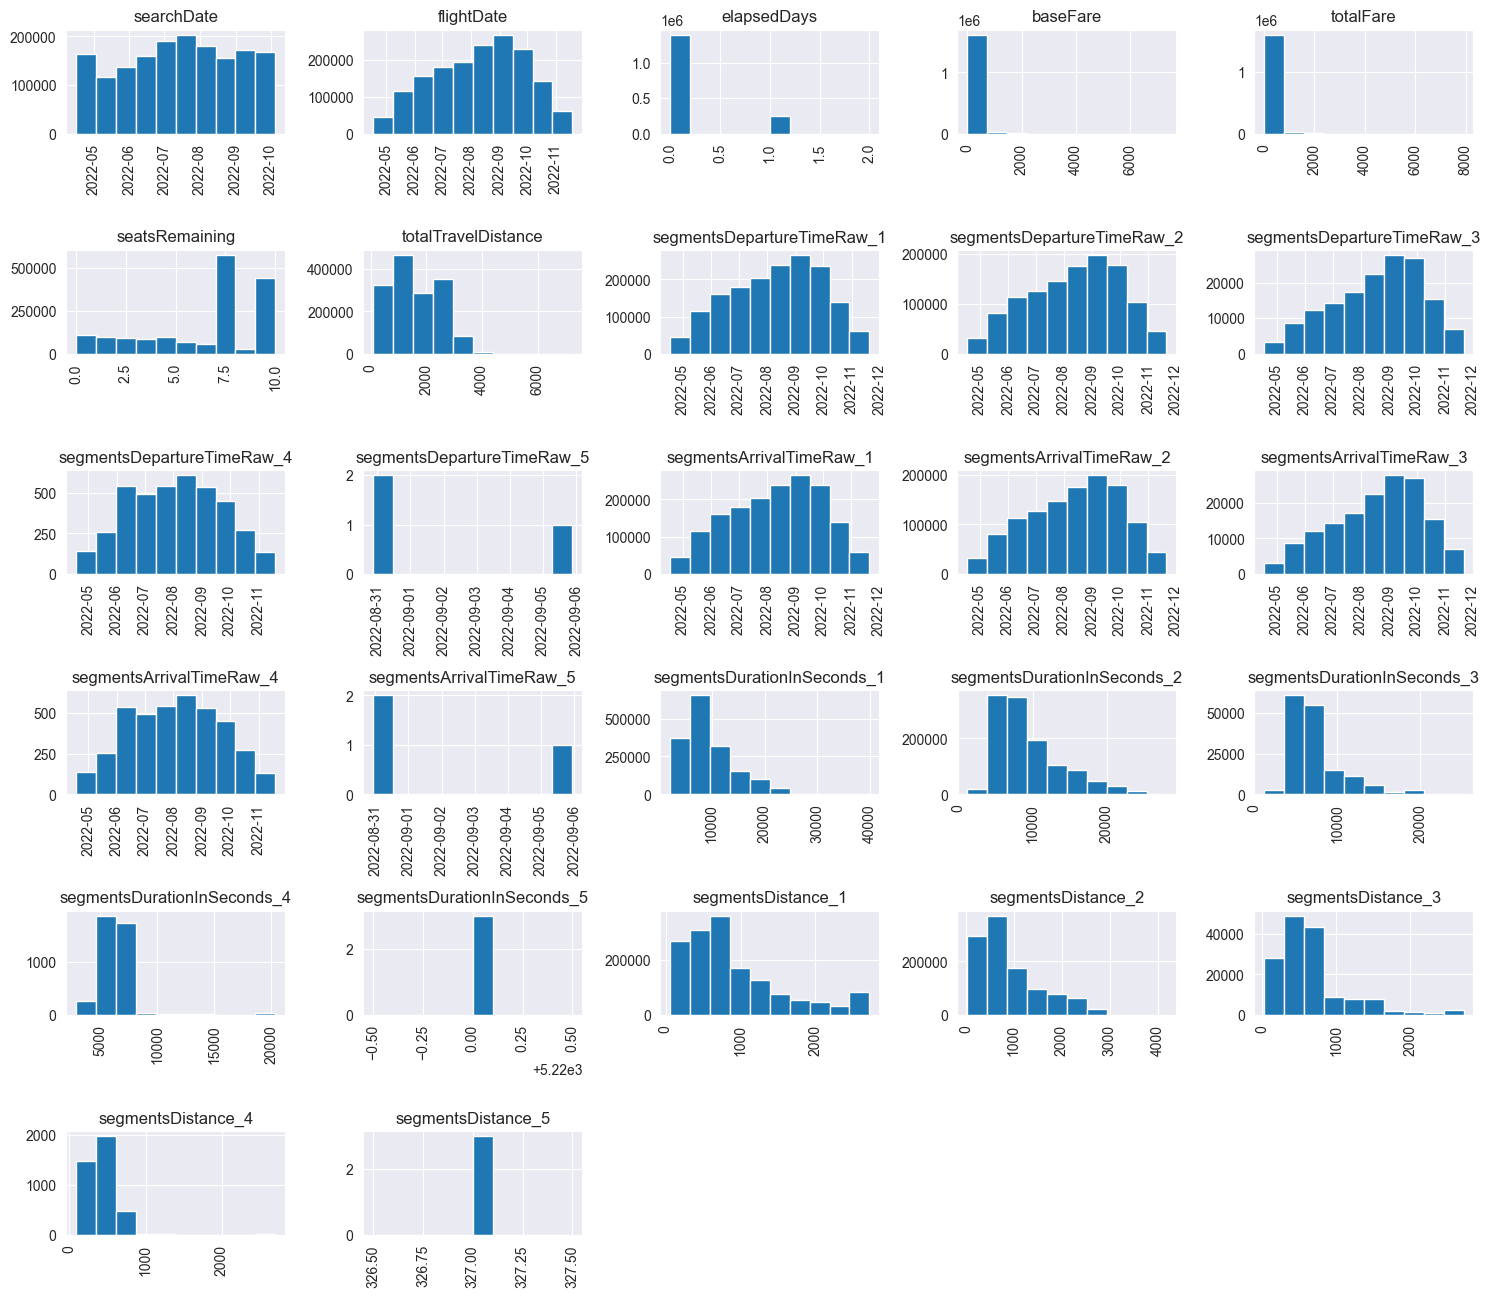

In [13]:
axes = data.hist(figsize=(15, 13))

for ax in axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Frequenza dati booleani

La maggior parte dei voli è di tipo non *basic economy* 1406095 occorrenze rispetto ai soli 236680 di voli *basic economy*. Questo indica che la classe *basic economy* è poco utilizzata.

In [18]:
print(data['isBasicEconomy'].value_counts())

isBasicEconomy
False    1406095
True      236680
Name: count, dtype: int64


Una grandissima parte dei voli è non *refundable* 1642756 occorrenze rispetto ai soli 19 voli che consentono il rimborso. Questo significa che la maggior parte delle offerte non prevede il rimborso.

In [19]:
print(data['isRefundable'].value_counts())

isRefundable
False    1642756
True          19
Name: count, dtype: int64


Una parte consistente dei voli è con fermate, 1201293 occorrenze rispetto ai 441482 voli *non stop*. Questo suggerisce che anche essendo comuni i voli *non stop* la maggior parte dei voli fanno comunque scalo.

In [20]:
print(data['isNonStop'].value_counts())

isNonStop
False    1201293
True      441482
Name: count, dtype: int64


Stesse informazioni sulla distribuzione dei valori booleani ma rappresentati graficamente.

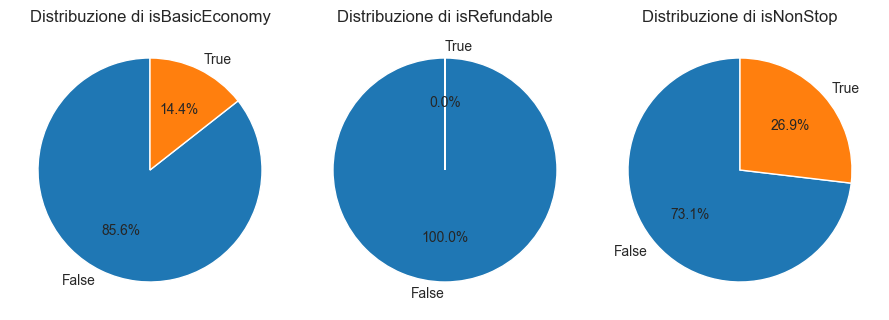

In [21]:
boolean_columns = data.select_dtypes(include=['bool']).columns

fig, axes = plt.subplots(nrows=1, ncols=len(boolean_columns), figsize=(3 * len(boolean_columns), 5))

for ax, col in zip(axes, boolean_columns):
    counts = data[col].value_counts()
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribuzione di {col}')

plt.tight_layout()
plt.show()

### Frequenza dati categorici

Per calcolare invece la frequenza di ciascun valore in una colonna categorica, si è usato `value_counts()`.

Considerando le colonne categoriche *startingAirport* e *destinationAirport*, dai seguenti dati emerge che *LAX* è l'aeroporto più trafficato nel dataset, con 161326 voli in partenza e 159716 in arrivo. È seguito da *LGA* e *BOS* per il numero di partenze e da *DFW* per il numero di arrivi.

In [14]:
print(data['startingAirport'].value_counts())

startingAirport
LAX    161326
LGA    118959
BOS    117588
SFO    114690
DFW    113762
ORD    110207
CLT    109514
ATL    105455
MIA     98341
PHL     94605
DEN     93876
DTW     90617
JFK     88337
EWR     79084
OAK     76424
IAD     69990
Name: count, dtype: int64


In [15]:
print(data['destinationAirport'].value_counts())

destinationAirport
LAX    159716
LGA    122006
DFW    119330
BOS    116588
ORD    114424
SFO    111751
CLT    108115
ATL    104001
MIA    102136
PHL     93958
DEN     92487
DTW     88913
JFK     88009
EWR     81703
OAK     73236
IAD     66402
Name: count, dtype: int64


Tramite il grafico a torta è intuitivamente più semplice vedere la quantità di voli associati a ciascun aeroporto di partenza e destinazione.

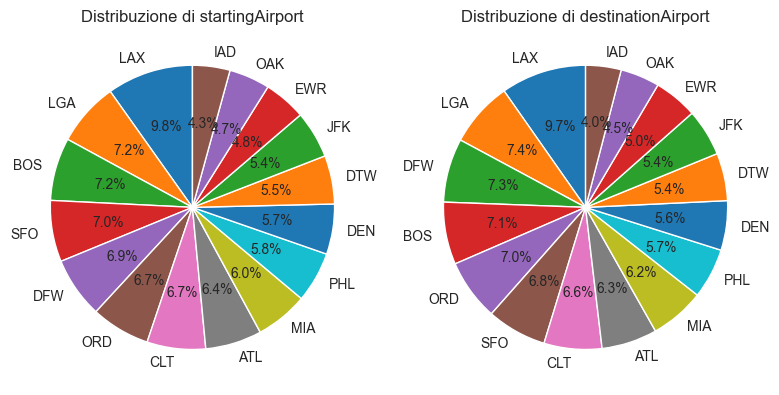

In [16]:
airport_columns = 'startingAirport', 'destinationAirport'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

for ax, col in zip(axes, airport_columns):
    counts = data[col].value_counts()
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribuzione di {col}')

plt.tight_layout()
plt.show()

## Analisi segmenti

Per analizzare le tratte di volo, si è deciso di considerare le colonne relative ai segmenti, che si è ritenuto più significativi, ovvero: *segmentsDepartureAirportCode*, *segmentsArrivalAirportCode*.

Per ciascuna tratta si vuole mostrare la frequenza delle 10 tratte più comuni. Dal secondo segmento fino al quinto, si nota la presenza di pochi dati, come evidenziato anche dalla relazione `nan -> nan` suggerendo che pochi voli hanno da 2 a 5 tratte e che la maggior parte sono voli diretti.

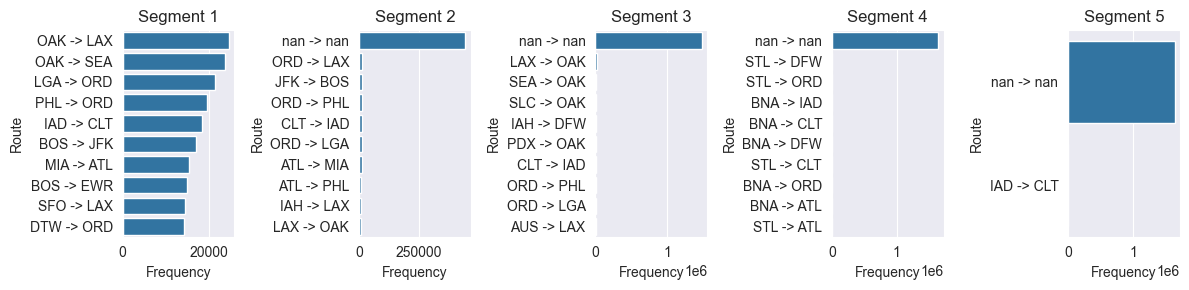

In [29]:
num_routes = 5
routes = pd.DataFrame()

fig, axes = plt.subplots(1, num_routes, figsize=(12, 3))

for i in range(1, num_routes + 1):
    departure_col = f'segmentsDepartureAirportCode_{i}'
    arrival_col = f'segmentsArrivalAirportCode_{i}'

    routes[f'route_{i}'] = data[departure_col].astype(str) + " -> " + data[arrival_col].astype(str)

    route_counts = routes[f'route_{i}'].value_counts()
    sns.countplot(data=routes, y=f'route_{i}', order=route_counts.index[:10], ax=axes[i-1])
    axes[i-1].set_title(f'Segment {i}')
    axes[i-1].set_xlabel('Frequency')
    axes[i-1].set_ylabel('Route')

plt.tight_layout()
plt.show()

Per analizzare la distanza e la durata dei segmenti di volo, si è deciso di considerare le colonne *segmentsDistance* e *segmentsDurationInSeconds*. Si è scelto di rappresentare graficamente i dati attraverso uno scatterplot per ciascun segmento. La prima cosa che si può osservare da questi grafici è la correlazione tra distanza e durata, che è abbastanza evidente. Anche in questo caso nei segmenti 4 e 5 si nota la presenza di pochi dati.

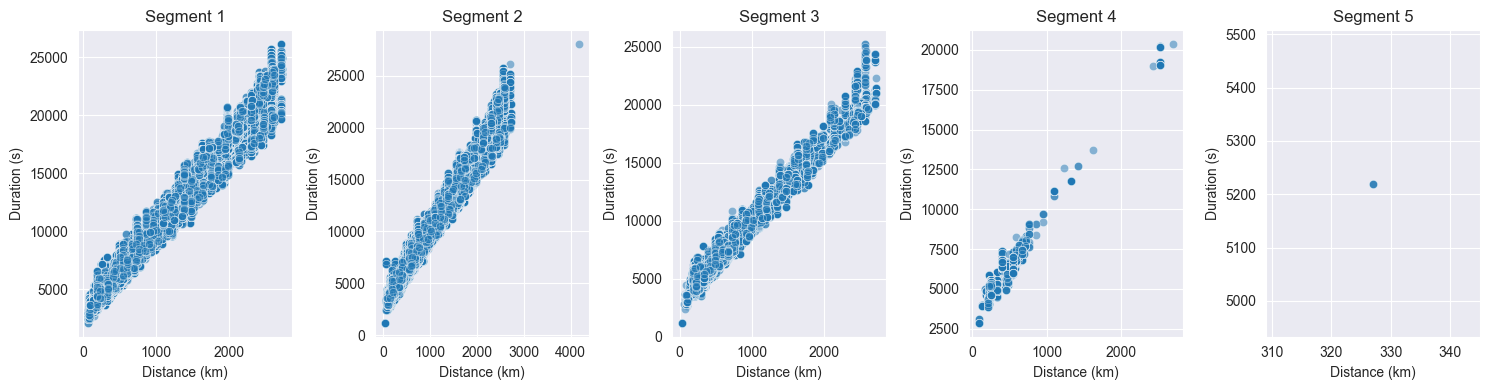

In [30]:
fig, axes = plt.subplots(1, num_routes, figsize=(15, 4))

for i in range(1, num_routes + 1):
    distance_col = f'segmentsDistance_{i}'
    duration_col = f'segmentsDurationInSeconds_{i}'

    sns.scatterplot(x=data[distance_col], y=data[duration_col], alpha=0.5, ax=axes[i-1])
    axes[i-1].set_title(f'Segment {i}')
    axes[i-1].set_xlabel('Distance (km)')
    axes[i-1].set_ylabel('Duration (s)')

plt.tight_layout()
plt.show()

### Analisi temporale

Per analizzare i dati temporali, si è deciso di considerare la colonna *flightDate*. Si vuole visualizzare la distribuzione dei voli in base al mese, dato che si hanno le informazioni relative a un solo anno e allo scopo si è creata una nuova colonna `month`. Il grafico mostra come è stato osservato anche dalle precedenti analisi, che i mesi di luglio, agosto e settembre sono i più trafficati.

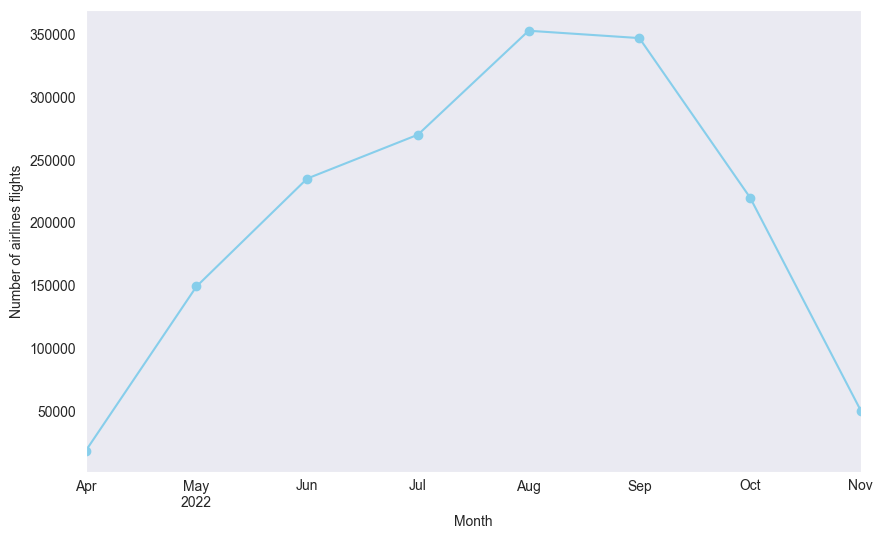

In [22]:
data['month'] = data['flightDate'].dt.tz_localize(None).dt.to_period('M')
monthly_flights = data.groupby('month').size()

plt.figure(figsize=(10, 6))
monthly_flights.plot(kind='line', marker='o', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of airlines flights')
plt.grid()
plt.show()

Per analizzare la distanza di giorni intercorsi tra la data di ricerca e la data del volo, si è calcolata la differenza in giorni tra le due date. La distribuzione dei giorni di differenza è mostrata attraverso un boxplot. Si può notare che:
- la mediana è intorno ai 30 giorni, il che indica che molte persone prenotano un mese prima;
- l'intervallo interquartile va da circa 10 a 40 giorni, suggerendo che la maggior parte delle prenotazioni avviene in questo periodo di tempo;
- non sembrano esserci outlier evidenti, quindi non ci sono prenotazioni estremamente anticipate o all'ultimo minuto.

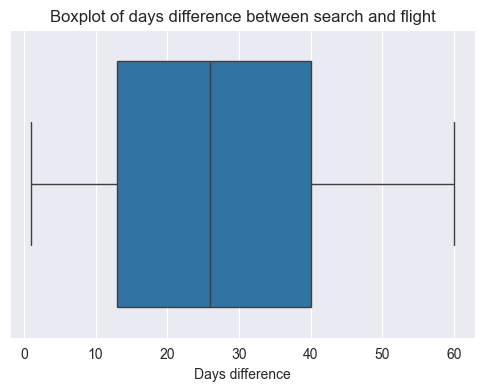

In [23]:
days_diff = (data["flightDate"] - data["searchDate"]).dt.days

plt.figure(figsize=(6, 4))
sns.boxplot(x=days_diff)
plt.xlabel("Days difference")
plt.title("Boxplot of days difference between search and flight")
plt.show()

### Correlazioni tra dati numerici

La matrice di correlazione è una matrice quadrata, simmetrica e con gli elementi della diagonale principale tutti uguali ad 1.
 La correlazione indica la relazione lineare esistente tra due variabili:
- 1 significa che le due variabili hanno una relazione lineare diretta, vale a dire che all’aumentare di una aumenta anche l’altra;
- 0 significa che non è possibile stabilire fra le due variabili un andamento lineare;
- -1 significa che le due variabili hanno una relazione lineare inversa, vale a dire che all’aumentare di una, l’altra diminuisce.


Tramite la matrice di correlazione, innanzitutto è possibile notare come il prezzo base (*baseFare*) sia correlato al prezzo totale (*totalFare*), l'importo è lo stesso con l'aggiunta di tasse o spese fisse. Le correlazioni però più importanti sono tra la durata del viaggio (*travelDuration*) con la distanza (*totalDistance*) e tra la distanza e il prezzo base/totale. 
La prima è una correlazione abbastanza forte, più vicina all'1, indica che la durata è influenzata dalla distanza.
Una correlazione di 0.49 tra prezzo e distanza, invece, suggerisce che i voli più lunghi tendono a costare di più, ma ci sono altre variabili che possono influenzare il prezzo (ad esempio, la compagnia aerea, la domanda, la stagione, ecc.), quindi non è una relazione perfetta.

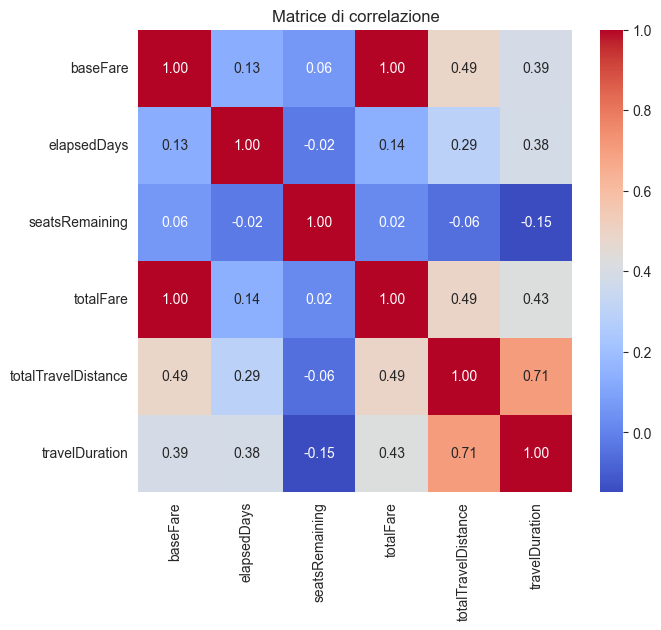

In [24]:
numeric_columns = data.select_dtypes(include=['number']).columns
columns_to_exclude = data.filter(regex='segmentsDepartureTimeRaw|segmentsDistance|segmentsDurationInSeconds').columns
corr_matrix_columns = numeric_columns.difference(columns_to_exclude)

correlation_matrix = data[corr_matrix_columns].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di correlazione')
plt.show()